# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

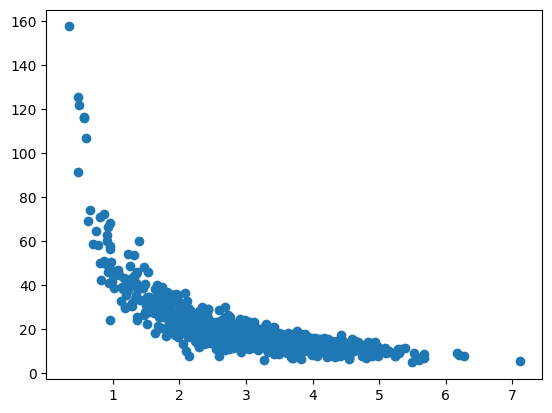

In [1]:
%matplotlib inline
from pylab import *
import numpy as np

#C'est une fonction de la bibliothèque NumPy qui initialise le générateur de nombres aléatoires de NumPy avec 
#une graine (seed) spécifique, dans ce cas 2.
np.random.seed(2)

#On génère un tableau de 1000 valeurs avec un moyenne=3.0 et un écart-type=1.0
pageSpeeds = np.random.normal(3.0, 1.0, 1000)

#Dans ce cas on va opter pour une formule mathématique non linéaire de la forme 1/x 
#Exemple précedent = ax + b
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

#La fonction np.polyfit renvoie d'abord les coefficients du polynôme de degré 4
#Ces coefficients sont calculés avec la méthode des moindres carrées 
#Par la suite, on prends ces coeffs pour créer un objet p4 de la classe np.poly1d
p4 = np.poly1d(np.polyfit(x, y, 4))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

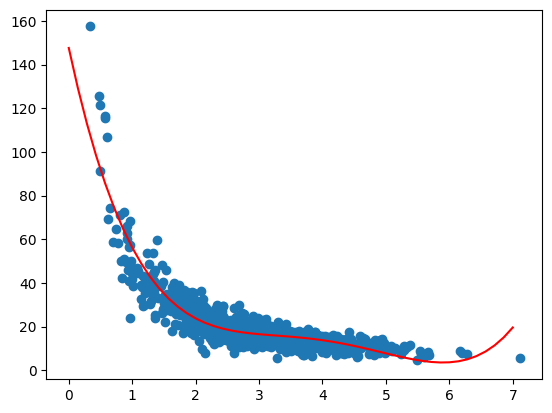

In [3]:
import matplotlib.pyplot as plt

# xp est un tableau qui contient 50 valeurs entre 0 et 7 avec un écart entre chaque valeur de 0.14285714 
xp = np.linspace(0, 7)

plt.scatter(x, y, label='Données')
# p4(xp) = on calcule la valeur de chaque élément de xp avec le polynôme p4
plt.plot(xp, p4(xp), c='r', label='Polynôme de degré 4')
plt.legend()
plt.show()

Measure the r-squared error :

In [4]:
from sklearn.metrics import r2_score

#r2_score est une fonction de la bibliothèque sklearn.metrics pour calculer le coeff de détermination 
#On va utiliser cette fonction pour calculer la proportion de la variance entre la valeur souhaitée 'y' et la valeur calculée avec p4 'p4'
r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303073


## Activity

Try different polynomial orders smaller and bigger than 4. Can you get a better fit with higher orders? What are your comments on the shape of the plot and the R-sqruared measure?

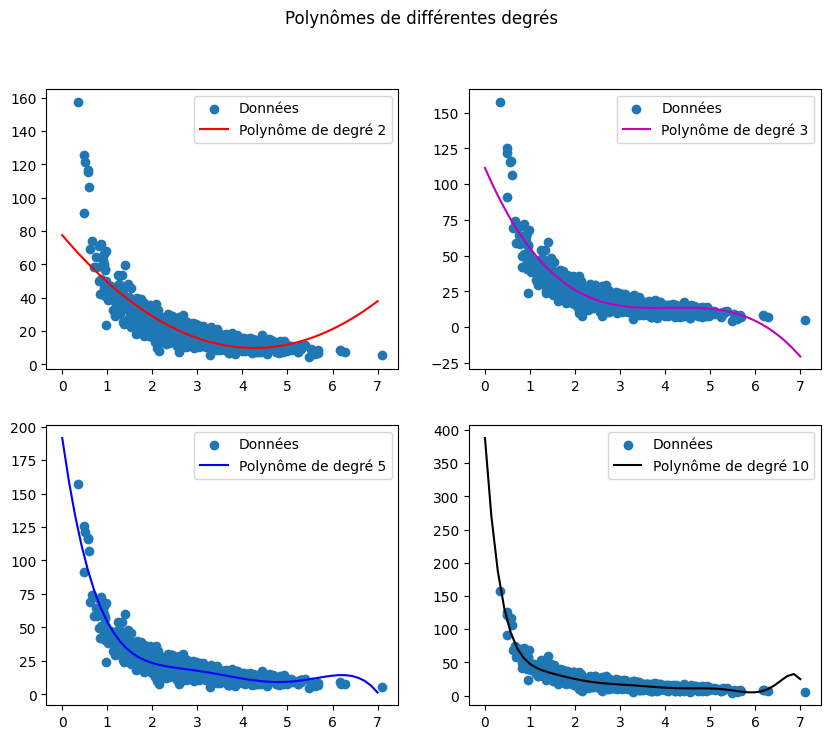

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

#Générer des polynômes de degré 2,3,5,10
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))
p5 = np.poly1d(np.polyfit(x, y, 5))
p10 = np.poly1d(np.polyfit(x, y, 10))

# xp est un tableau qui contient 50 valeurs entre 0 et 7 avec un écart entre chaque valeur de 0.14285714 
xp = np.linspace(0, 7)

# create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# plot p2 on the first subplot
axes[0, 0].scatter(x, y, label='Données')
axes[0, 0].plot(xp, p2(xp), c='r', label='Polynôme de degré 2')
axes[0, 0].legend()

# plot p3 on the second subplot
axes[0, 1].scatter(x, y, label='Données')
axes[0, 1].plot(xp, p3(xp), c='m', label='Polynôme de degré 3')
axes[0, 1].legend()

# plot p5 on the third subplot
axes[1, 0].scatter(x, y, label='Données')
axes[1, 0].plot(xp, p5(xp), c='b', label='Polynôme de degré 5')
axes[1, 0].legend()

# plot p10 on the fourth subplot
axes[1, 1].scatter(x, y, label='Données')
axes[1, 1].plot(xp, p10(xp), c='k', label='Polynôme de degré 10')
axes[1, 1].legend()

# set a common title for all subplots
fig.suptitle('Polynômes de différentes degrés')

# display the plot
plt.show()

In [6]:
from sklearn.metrics import r2_score

r2_p2 = r2_score(y, p2(x))
r2_p3 = r2_score(y, p3(x))
r2_p5 = r2_score(y, p5(x))
r2_p10 = r2_score(y, p10(x))

print(f'R_squared pour polynôme de degré 2 = {r2_p2}')
print(f'R_squared pour polynôme de degré 3 = {r2_p3}')
print(f'R_squared pour polynôme de degré 5 = {r2_p5}')
print(f'R_squared pour polynôme de degré 10 = {r2_p10}')

R_squared pour polynôme de degré 2 = 0.6927446350535892
R_squared pour polynôme de degré 3 = 0.7842354030823269
R_squared pour polynôme de degré 5 = 0.8553884386186104
R_squared pour polynôme de degré 10 = 0.8832172356257348


On peut deduire que la bonne performance assuree par le modele est proportionelle avec le degre du polynome, plus ce dernier augmente plus le modele construit est performant.